# <center>NBFI Vehicle Loan repayment Dataset</center>

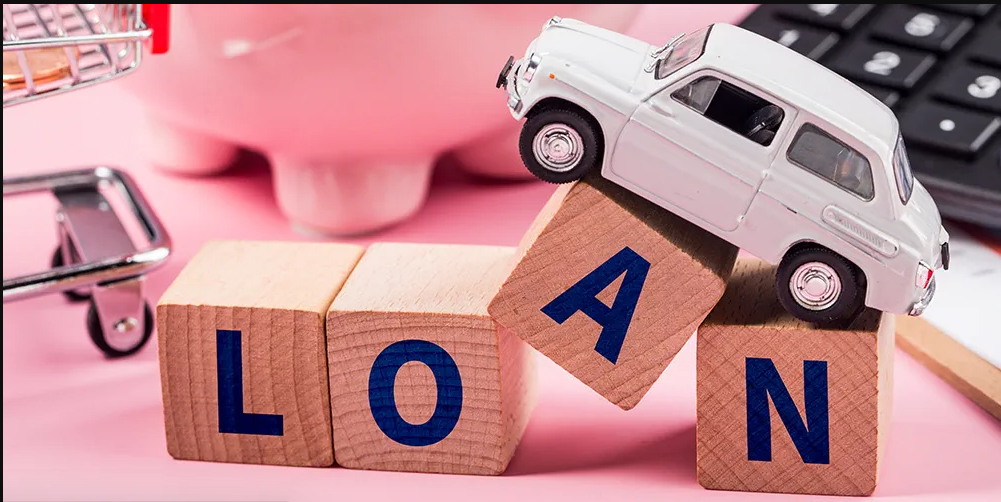

In [118]:
from IPython import display
display.Image("image.PNG")

## About Dataset

A non-banking financial institution (NBFI) or non-bank financial company (NBFC) is a type of financial institution that is not authorized to operate as a bank or is not under the supervision of a banking regulatory agency at the national or international level. NBFCs provide financial services similar to those of banks, such as investment, risk pooling, contractual savings, and market brokering.

An NBFC is currently facing profitability issues due to an increase in defaults in the vehicle loan category. The company aims to assess the loan repayment ability of clients and determine the relative importance of each factor contributing to a borrower's ability to repay the loan.

The objective is to predict whether a client is likely to default on their vehicle loan payment or not. The task involves building a model using the Train_Dataset and testing the model on the Test_Dataset. The predictions for each ID in the Test_Dataset are to be submitted to the Hackathon platform.

<b>Variable Description</b>
    
<b>ID:</b>	Client Loan application ID

<b>Client_Income:</b>	Client Income in USD

<b>Car_Owned:</b>	Any Car owned by client before applying for the loan for another car (0 means No and 1 means otherwise)

<b>Bike_Owned:</b>	Any bike owned by client (0 means No and 1 means otherwise)

<b>Active_Loan:</b>	Any other active loan at the time of aplication of loan (0 means No and 1 means otherwise)

<b>House_Own:</b>	Any house owned by client (0 means No and 1 means otherwise)

<b>Child_Count:</b>	Number of children the client has

<b>Credit_Amount:</b>	Credit amount of the loan in USD

<b>Loan_Annuity:</b>	Loan annuity in USD

<b>Accompany_Client:</b>	Who accompanied the client when client applied for the loan

<b>Client_Income_Type:</b>	Clients income type

<b>Client_Education:</b>	Highest level of education ahieved by client

<b>Client_Marital_Status:</b>	Marital status of client (D- Divorced, S- Single, M- Married, W- Widowed)
    
<b>Client_Gender:</b>	Gender of the Client

<b>Loan_Contract_Type:</b>	Loan Type (CL- Cash Loan, RL- Revolving Loan)
    
<b>Client_Housing_Type:</b>	Client Housing situation

<b>Population_Region_Relative:</b>	Relative population of the region where the client is living. Higher value means the client is living in more populated area

<b>Age_Days:</b>	Age of the client at the time of application submission

<b>Employed_Days:</b>	Days before the application, the client started earning

<b>Registration_Days:</b>	Days before the loan application, the client changed his/her registration

<b>ID_Days:</b>	Days before the loan application, the client changed his/her identity document with which the loan was applied

<b>Own_House_Age:</b>	Age of Client's house in years

<b>Mobile_Tag:</b>	Mobile Number provided by Client (1 means Yes and 0 means No)

<b>Homephone_Tag:</b>	Homephone Number provided by Client (1 means Yes and 0 means No)

<b>Workphone_Working:</b>	Was workphone number reachable (1 means Yes and 0 means No)

<b>Client_Occupation:</b>	Client Occupation type

<b>Client_Family_Members:</b>	Number of family members does client have

<b>Cleint_City_Rating:</b>	Client city rating. 3 denotes best and 2 denotes good and 1 denotes average

<b>Application_Process_Day:</b>	Day of the week on which client applied for the loan (0-Sun, 1-Mon,2-Tues, 3-Wed, 4-Thrus,5-Fri, 6-Sat)

<b>Application_Process_Hour:</b>	hour of the day on which client applied for the loan

<b>Client_Permanent_Match_Tag:</b>	Indication if client contact address does not match permanent address.

<b>Client_Contact_Work_Tag:</b>	Indication if client work address does not match contact address.

<b>Type_Organization:</b>	Type of organization where client works

<b>Score_Source_1:</b>	Score sourced from other source. This is a normalzied socre

<b>Score_Source_2:</b>	Score sourced from other source. This is a normalzied socre

<b>Score_Source_3:</b>	Score sourced from other source. This is a normalzied socre

<b>Social_Circle_Default:</b>	How many friends/family member of client defaulted on any loan payment in last 60 days

<b>Phone_Change:</b>	How many days before the loan application, client changed his/her phone

<b>Credit_Bureau:</b>	Total number of enquiries in last year

<b>Default:</b>	1 means the client defaulted on loan payments and 0 means otherwise


#### Imporing librabries

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', None)

#### Data Loading

In [120]:
train = pd.read_csv('Train_Dataset.csv')
test = pd.read_csv('Test_Dataset.csv')

In [121]:
train.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,0.0,1,0,1,NaN,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,Service,Graduation dropout,W,Male,CL,Family,0.0228,16790,5102,NaN,331,NaN,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,NaN,775,NaN,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,6.0,1,0,0,Laborers,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [122]:
train['Own_House_Age']

0         NaN
1         0.0
2         NaN
3         NaN
4         6.0
         ... 
121851    NaN
121852    NaN
121853    NaN
121854    4.0
121855    6.0
Name: Own_House_Age, Length: 121856, dtype: float64

In [123]:
train.shape

(121856, 40)

In [124]:
test.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau
0,12202227,11250,0.0,1.0,1.0,1.0,0.0,112500,4474.8,Relative,Service,NaN,M,Male,CL,Home,0.019101,20063,2523,2318,3318,NaN,1,0,0,NaN,NaN,2.0,4.0,16.0,Yes,Yes,Self-employed,NaN,0.757151,0.629674,0.0515,716.0,2.0
1,12279381,13500,1.0,1.0,1.0,1.0,3.0,49752,3252.15,Alone,Service,Secondary,M,Female,CL,Home,0.0105,13200,551,6972,3865,6.0,1,1,0,Laborers,5.0,3.0,3.0,18.0,No,Yes,Self-employed,NaN,0.342269,NaN,NaN,181.0,NaN
2,12222714,38250,0.0,1.0,0.0,1.0,0.0,67500,3375,Alone,Commercial,Graduation,M,Female,RL,Home,0.032561,15943,1319,981,2296,NaN,1,0,1,Managers,2.0,1.0,2.0,19.0,Yes,Yes,Business Entity Type 3,NaN,0.683665,NaN,0.1503,281.0,NaN
3,12265215,20250,0.0,0.0,1.0,0.0,0.0,50849.55,3814.65,Alone,Govt Job,Secondary,S,Male,CL,NaN,0.01452,15634,1510,4975,6121,NaN,1,1,1,NaN,1.0,2.0,6.0,20.0,No,No,Medicine,0.351581,0.22995,0.672243,NaN,1442.0,4.0
4,12203970,13500,1.0,1.0,0.0,1.0,0.0,43603.2,2515.95,Alone,Service,Secondary,M,Female,CL,Home,0.008625,15811,1075,5478,3618,7.0,1,0,0,Managers,2.0,2.0,1.0,13.0,Yes,Yes,Self-employed,0.731110,0.566971,0.730987,NaN,927.0,1.0


In [125]:
test.shape

(80900, 39)

#### Note:
We shall be training and evaluating our model with the train set then do our prediction for the test set

In [126]:
df = train
df.shape

(121856, 40)

In [127]:
df.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [129]:
df.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')

In [130]:
df.nunique()

ID                            121856
Client_Income                   1516
Car_Owned                          2
Bike_Owned                         2
Active_Loan                        2
House_Own                          2
Child_Count                       14
Credit_Amount                   6816
Loan_Annuity                   16680
Accompany_Client                   7
Client_Income_Type                 8
Client_Education                   5
Client_Marital_Status              4
Client_Gender                      3
Loan_Contract_Type                 2
Client_Housing_Type                6
Population_Region_Relative       164
Age_Days                       22583
Employed_Days                  13220
Registration_Days              19254
ID_Days                         9655
Own_House_Age                     55
Mobile_Tag                         2
Homephone_Tag                      2
Workphone_Working                  2
Client_Occupation                 18
Client_Family_Members             15
C

### Data Cleaning and Preprocessing

#### from the columns, some of the numeric columns are not in the right datatype, even though their values are, so we need o convert them

In [131]:
#selecting the columns that might have the dollar sign
num_col = ['Client_Income', 'Credit_Amount', 'Loan_Annuity','Population_Region_Relative','Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Score_Source_3']

In [132]:
for i in num_col:
    df[i] = df[i].str.replace('[a-zA-Z!@#$%^&*()_+=-{};:"<>,./?]', '', regex=True)
    df[i] = pd.to_numeric(df[i], errors='coerce')

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               102336 non-null  float64
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               38718 non-null   float64
 8   Loan_Annuity                94358 non-null   float64
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

### Analysing the Null Values


In [134]:
count_nan = df.isnull().sum()
count_nan

ID                                 0
Client_Income                  19520
Car_Owned                       3581
Bike_Owned                      3624
Active_Loan                     3635
House_Own                       3661
Child_Count                     3638
Credit_Amount                  83138
Loan_Annuity                   27498
Accompany_Client                1746
Client_Income_Type              3701
Client_Education                3645
Client_Marital_Status           3473
Client_Gender                   2413
Loan_Contract_Type              3651
Client_Housing_Type             3687
Population_Region_Relative     43231
Age_Days                       10582
Employed_Days                  10631
Registration_Days              10589
ID_Days                        12853
Own_House_Age                  80095
Mobile_Tag                         0
Homephone_Tag                      0
Workphone_Working                  0
Client_Occupation              41435
Client_Family_Members           2410
C

In [135]:
# checking the percentage of null values in column
nan_percentage = df.isna().mean() * 100
df_null_per = pd.DataFrame({'Count':count_nan, 'Percentage':nan_percentage})
df_null_per

,Count,Percentage
ID,0,0.000000
Client_Income,19520,16.018908
Car_Owned,3581,2.938715
Bike_Owned,3624,2.974002
Active_Loan,3635,2.983029
House_Own,3661,3.004366
Child_Count,3638,2.985491
Credit_Amount,83138,68.226431
Loan_Annuity,27498,22.565980
Accompany_Client,1746,1.432839


In [136]:
#dropping the ID column
df.drop(columns=['ID'], inplace=True)

In [137]:
## Now Let's check if the entire NaN in the Dataset is below 30%

#counting the number of rows with null values
null_count = df.isnull().any(axis=1).sum()
null_count



#df.drop([col for col in df.columns if df[col].isna().sum() >= 0.5 * df.shape[0]], axis=1, inplace=True)


121856

In [138]:
df.isna().sum()

Client_Income                  19520
Car_Owned                       3581
Bike_Owned                      3624
Active_Loan                     3635
House_Own                       3661
Child_Count                     3638
Credit_Amount                  83138
Loan_Annuity                   27498
Accompany_Client                1746
Client_Income_Type              3701
Client_Education                3645
Client_Marital_Status           3473
Client_Gender                   2413
Loan_Contract_Type              3651
Client_Housing_Type             3687
Population_Region_Relative     43231
Age_Days                       10582
Employed_Days                  10631
Registration_Days              10589
ID_Days                        12853
Own_House_Age                  80095
Mobile_Tag                         0
Homephone_Tag                      0
Workphone_Working                  0
Client_Occupation              41435
Client_Family_Members           2410
Cleint_City_Rating              2409
A

In [139]:
if 0.3 * df.shape[0] <=  null_count:
    print('True')
    print('Do not exclude them try and treat them')
else:
    print('False')
    print("============================================================================")
    print('We need to Drop and exclude the rows that have NaN since its not up to 30 percent of our dataset')
    print("============================================================================")

True
Do not exclude them try and treat them


In [140]:
#dropping the columns whose NaN values are more than 50% but also appling domain knowledge, leaving some, so we can try fixing them
df.drop(columns=['Score_Source_1','Score_Source_3','Social_Circle_Default'], inplace=True)



In [141]:
df.isnull().sum()

Client_Income                 19520
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                 83138
Loan_Annuity                  27498
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative    43231
Age_Days                      10582
Employed_Days                 10631
Registration_Days             10589
ID_Days                       12853
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating             2409
Application_Process_Day     

In [142]:
#lets also drop the client_occupaion because it is related to the client_income, so their income can tell of their occupation, 
#so since it has a lot of NaN we can drop it.

df.drop(columns=['Client_Occupation'], inplace=True, axis=1)

In [143]:
# lets try filling the NaN values with either the mode or the median using simple inputer
from sklearn.impute import SimpleImputer

mode_inputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
mean_inputer = SimpleImputer(strategy="mean", missing_values=np.nan)

In [144]:
df.nunique().reset_index()

,index,0
0,Client_Income,1112
1,Car_Owned,2
2,Bike_Owned,2
3,Active_Loan,2
4,House_Own,2
5,Child_Count,14
6,Credit_Amount,2983
7,Loan_Annuity,10046
8,Accompany_Client,7
9,Client_Income_Type,8


In [145]:
df.head(2)

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Phone_Change,Credit_Bureau,Default
0,6750.0,0.0,0.0,1.0,0.0,0.0,6119055.0,341685.0,Alone,Commercial,Secondary,M,Male,CL,Home,28663.0,13957.0,1062.0,6123.0,383.0,NaN,1,1,0,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.478787,63.0,NaN,0
1,20250.0,1.0,0.0,1.0,NaN,0.0,15282.0,182655.0,Alone,Service,Graduation,M,Male,CL,Home,8575.0,14162.0,4129.0,7833.0,21.0,0.0,1,0,1,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.215068,NaN,NaN,0


In [146]:
# fitting and transforming the non-numeric, and categorical columns with the Mode

df.iloc[:, 1 : 5] = mode_inputer.fit_transform(df.iloc[:, 1 : 5])
df.iloc[:, 8 : 15] = mode_inputer.fit_transform(df.iloc[:, 8 : 15])
df.iloc[:, 21 : 30] = mode_inputer.fit_transform(df.iloc[:, 21 : 30])
df.iloc[:, 30 : 34] = mode_inputer.fit_transform(df.iloc[:, 30 : 34])

# fitting and transforming the numeric, and non-categorical columns with the Mean
df[['Client_Income']] = mean_inputer.fit_transform(df[['Client_Income']])
df.iloc[:, 5 : 8] = mean_inputer.fit_transform(df.iloc[:, 5 : 8])
df.iloc[:, 15 : 21] = mean_inputer.fit_transform(df.iloc[:, 15 : 21])


In [147]:
df.isnull().sum()

Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Own_House_Age                 0
Mobile_Tag                    0
Homephone_Tag                 0
Workphone_Working             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Type_Organization             0
Score_So

In [148]:
df

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Phone_Change,Credit_Bureau,Default
0,6750.0,0.0,0.0,1.0,0.0,0.0,6119055.0,341685.000000,Alone,Commercial,Secondary,M,Male,CL,Home,28663.000000,13957.000000,1062.000000,6123.000000,383.000000,12.157324,1,1,0,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.478787,63.0,0.0,0
1,20250.0,1.0,0.0,1.0,1.0,0.0,15282.0,182655.000000,Alone,Service,Graduation,M,Male,CL,Home,8575.000000,14162.000000,4129.000000,7833.000000,21.000000,0.000000,1,0,1,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.215068,0.0,0.0,0
2,18000.0,0.0,0.0,1.0,0.0,1.0,5952735.0,27882.000000,Alone,Service,Graduation dropout,W,Male,CL,Family,228.000000,16790.000000,5102.000000,4977.736723,331.000000,12.157324,1,0,0,2.0,2.0,4.0,10.0,Yes,Yes,Self-employed,0.552795,277.0,0.0,0
3,15750.0,0.0,0.0,1.0,1.0,0.0,538704.0,229545.000000,Alone,Retired,Secondary,M,Male,CL,Home,10556.000000,23195.000000,365243.000000,4977.736723,775.000000,12.157324,1,0,0,2.0,3.0,2.0,15.0,Yes,Yes,XNA,0.135182,1700.0,3.0,0
4,33750.0,1.0,0.0,1.0,0.0,2.0,1339884.0,354735.000000,Alone,Commercial,Secondary,M,Female,CL,Home,20713.000000,11366.000000,2977.000000,5516.000000,4043.000000,6.000000,1,0,0,4.0,1.0,3.0,10.0,Yes,Yes,Business Entity Type 3,0.301182,674.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,29250.0,0.0,0.0,0.0,1.0,0.0,107820.0,138960.753418,Relative,Service,Secondary,M,Female,CL,Home,17264.264432,16028.868442,67133.268429,4977.736723,2986.178729,12.157324,1,0,0,2.0,2.0,4.0,16.0,Yes,No,Business Entity Type 2,0.173527,0.0,1.0,1
121852,15750.0,0.0,1.0,1.0,0.0,0.0,104256.0,138960.753418,Alone,Commercial,Graduation,M,Female,CL,Home,17264.264432,16028.868442,67133.268429,4977.736723,2986.178729,12.157324,1,1,0,2.0,3.0,4.0,12.0,Yes,Yes,Self-employed,0.371559,4.0,0.0,0
121853,8100.0,0.0,1.0,0.0,1.0,1.0,551079.0,138960.753418,Alone,Govt Job,Secondary,M,Male,CL,Home,17264.264432,16028.868442,67133.268429,4977.736723,2986.178729,12.157324,1,0,0,3.0,3.0,5.0,11.0,No,No,Trade: type 6,0.048079,0.0,0.0,0
121854,38250.0,1.0,1.0,0.0,1.0,0.0,45000.0,138960.753418,Alone,Service,Graduation,M,Female,CL,Home,17264.264432,16028.868442,67133.268429,4977.736723,2986.178729,4.000000,1,0,0,2.0,2.0,1.0,12.0,Yes,Yes,Business Entity Type 3,0.103538,0.0,2.0,0


In [149]:
df['Score_Source_2'].dtype

dtype('float64')

In [150]:
#separating the categorical and the numerical variables
cat_col = [col for col in df.columns if df[col].dtype == 'O']
num_col = [col for col in df.columns if df[col].dtype == 'in64' or df[col].dtype == 'float64' ]

In [151]:
cat_col

['Accompany_Client',
 'Client_Income_Type',
 'Client_Education',
 'Client_Marital_Status',
 'Client_Gender',
 'Loan_Contract_Type',
 'Client_Housing_Type',
 'Client_Permanent_Match_Tag',
 'Client_Contact_Work_Tag',
 'Type_Organization']

In [152]:
num_col

['Client_Income',
 'Car_Owned',
 'Bike_Owned',
 'Active_Loan',
 'House_Own',
 'Child_Count',
 'Credit_Amount',
 'Loan_Annuity',
 'Population_Region_Relative',
 'Age_Days',
 'Employed_Days',
 'Registration_Days',
 'ID_Days',
 'Own_House_Age',
 'Client_Family_Members',
 'Cleint_City_Rating',
 'Application_Process_Day',
 'Application_Process_Hour',
 'Score_Source_2',
 'Phone_Change',
 'Credit_Bureau']

In [153]:
df.Default.value_counts()

Default
0    112011
1      9845
Name: count, dtype: int64

In [154]:
pie_view = df['Default'].value_counts()
pie_view

Default
0    112011
1      9845
Name: count, dtype: int64

Text(0.5, 1.0, 'Percenage of Default column')

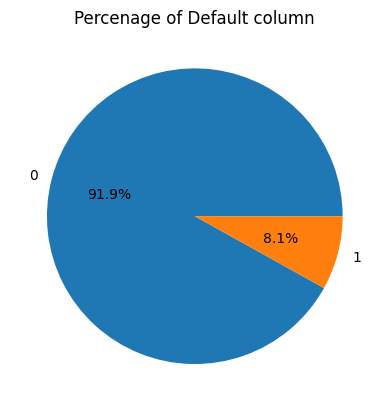

In [155]:
plt.pie(pie_view, labels=pie_view.index, autopct='%1.1f%%')
plt.title('Percenage of Default column')

<Axes: xlabel='Default', ylabel='count'>

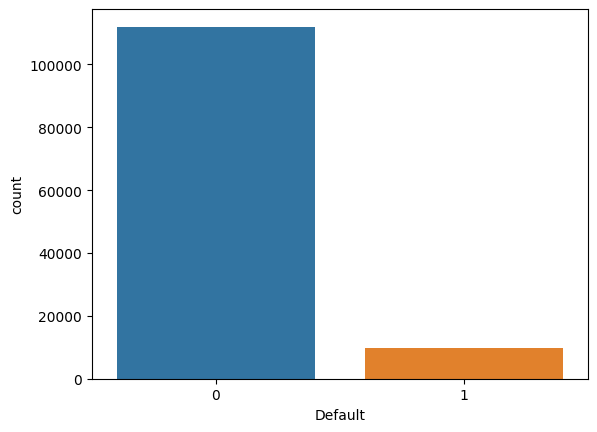

In [156]:
sns.countplot(data=df, x='Default')

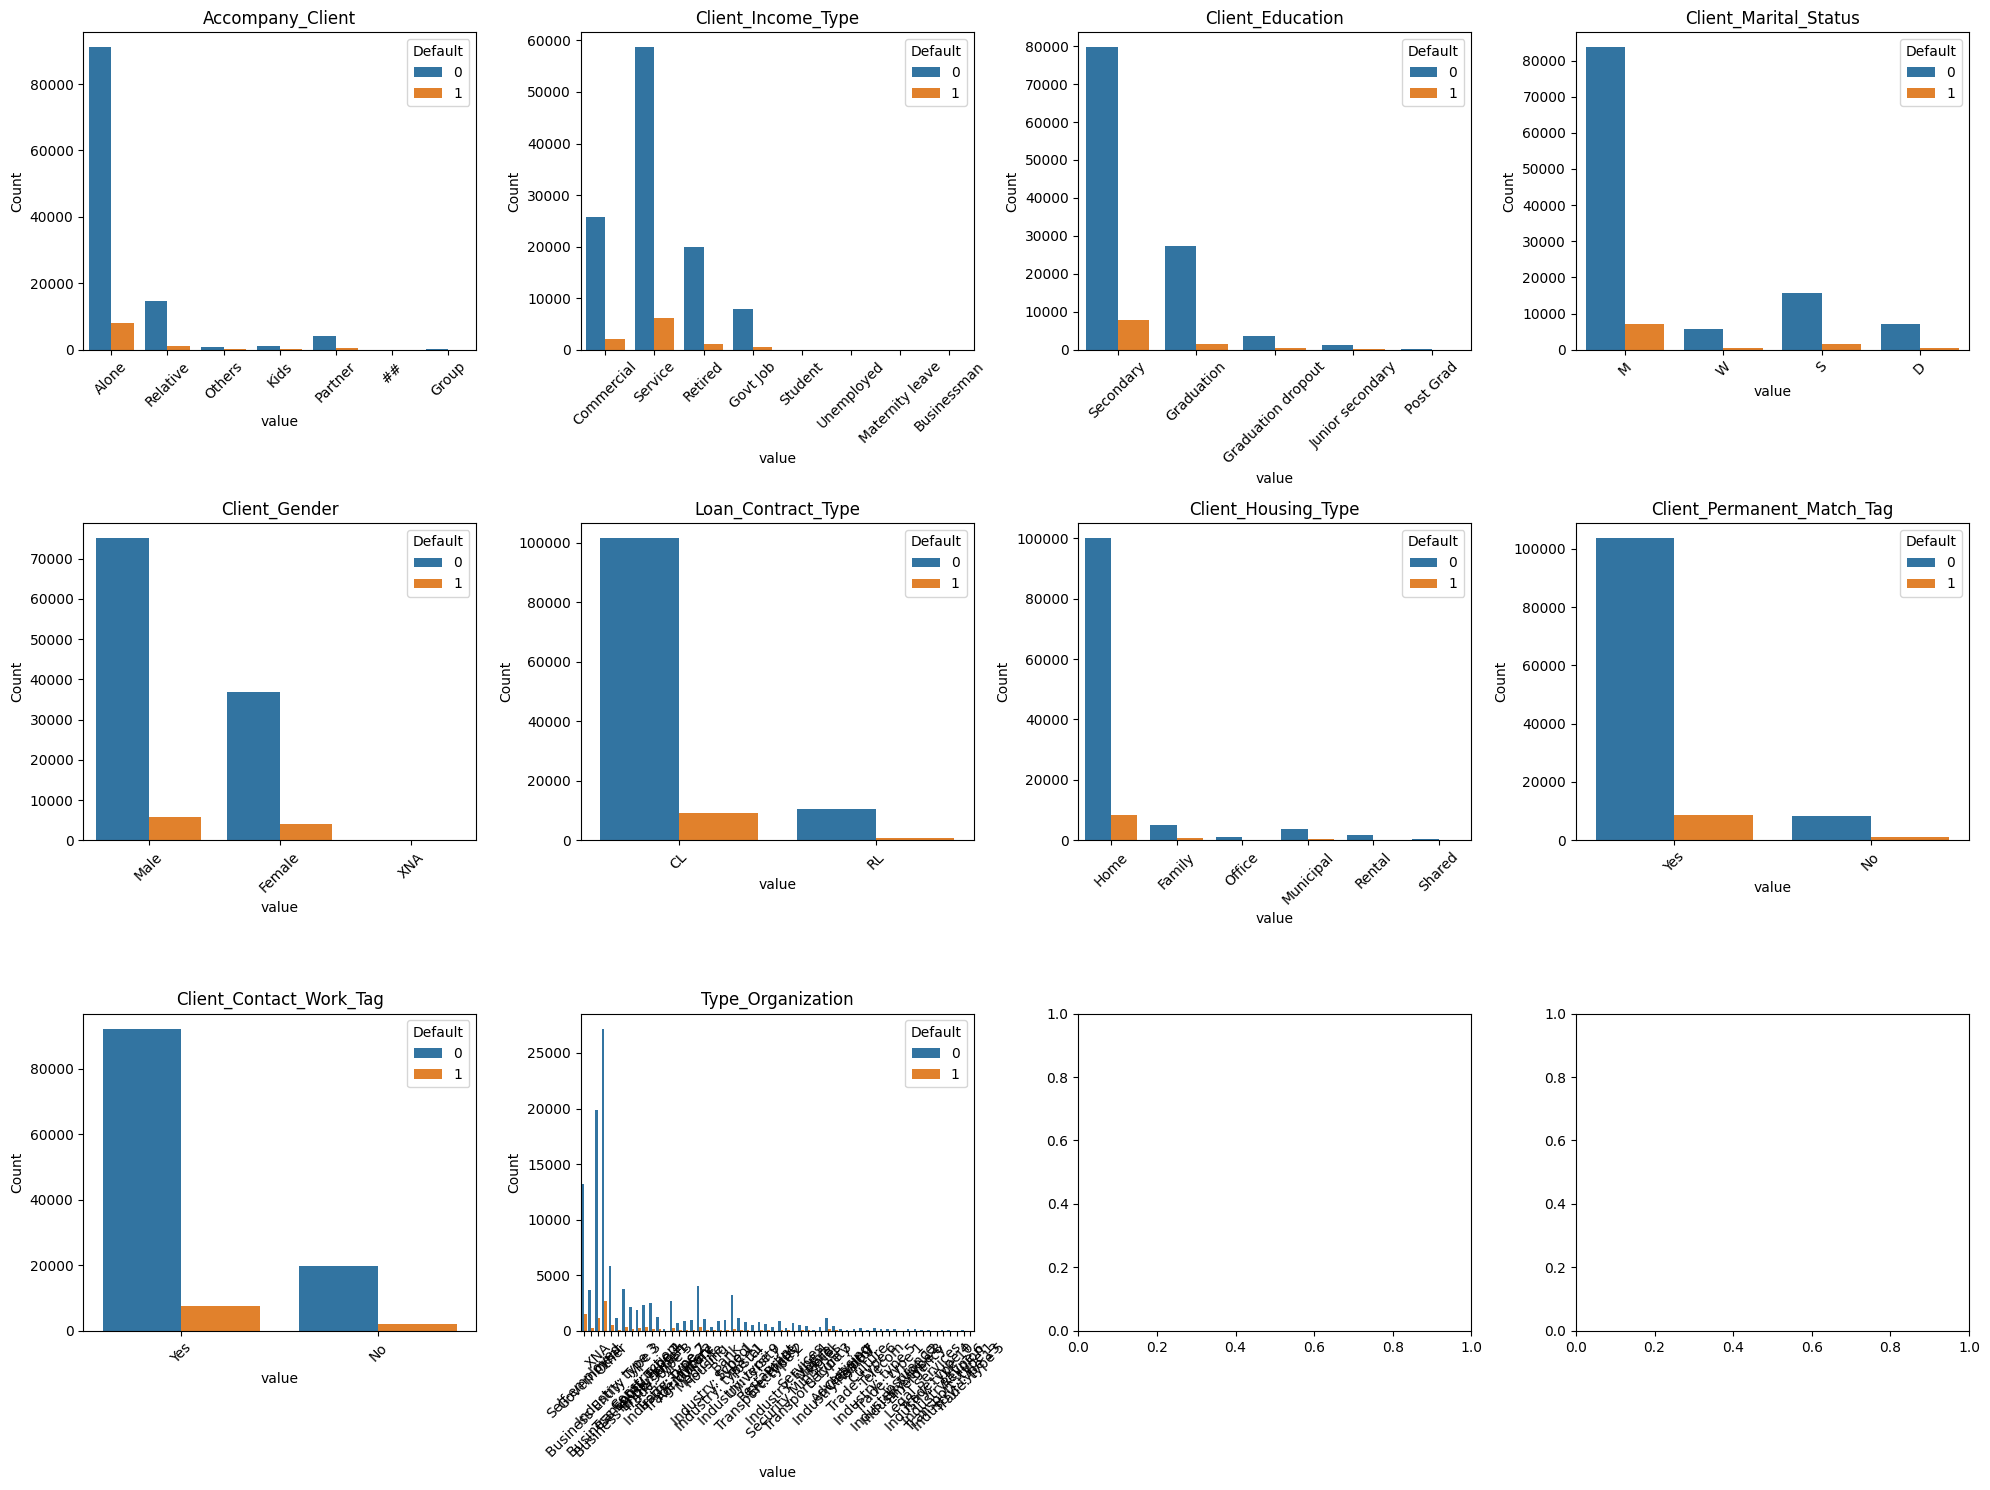

In [157]:
# visualize the categorical features
# Plot chart for the categorical feature
import math
num_features = len(cat_col)
num_rows = 3 
num_cols = math.ceil(num_features/num_rows)

# create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,15))

#flatten the axes if needed
if num_features > 1:
    axes = axes.flatten()
    
for i, columns in enumerate(cat_col):
    axe = axes[i]
    sns.countplot(data=df, x=columns, ax=axe, hue=df['Default'])
    axe.set_title(f'{columns}')
    axe.set_xlabel('value')
    axe.set_ylabel('Count')
    axe.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

In [158]:
df[num_col].describe()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_2,Phone_Change,Credit_Bureau
count,1.218560e+05,121856.000000,121856.000000,121856.000000,121856.000000,121856.000000,1.218560e+05,1.218560e+05,121856.000000,121856.000000,121856.000000,121856.000000,121856.000000,121856.000000,121856.000000,121856.000000,121856.000000,121856.000000,121856.000000,121856.000000,121856.000000
mean,2.379387e+04,0.332778,0.322381,0.484285,0.701311,0.417779,8.189547e+05,1.389608e+05,17264.264432,16028.868442,67133.268429,4977.736723,2986.178729,12.157324,2.151277,2.029445,3.136628,12.001083,0.507765,933.177185,1.603360
std,5.725321e+05,0.471210,0.467390,0.499755,0.457685,0.717841,1.230423e+06,1.423253e+05,11543.142645,4172.448882,132753.388032,3358.319836,1430.543882,7.057724,0.903871,0.499414,1.748957,3.250157,0.724436,831.822159,1.844076
min,2.610000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000e+03,2.880000e+02,100.000000,7676.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000005,0.000000,0.000000
25%,1.125000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,5.538060e+05,2.443500e+04,10032.000000,12753.000000,1028.000000,2277.000000,1894.000000,12.157324,2.000000,2.000000,2.000000,10.000000,0.350551,224.000000,0.000000
50%,1.620000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,8.189547e+05,1.389608e+05,17264.264432,16028.868442,2570.000000,4916.000000,2986.178729,12.157324,2.000000,2.000000,3.000000,12.000000,0.553171,721.000000,1.000000
75%,2.379387e+04,1.000000,1.000000,1.000000,1.000000,1.000000,8.189547e+05,1.908450e+05,19101.000000,19294.000000,67133.268429,7136.000000,4220.000000,12.157324,3.000000,2.000000,5.000000,14.000000,0.659828,1550.000000,3.000000
max,1.916515e+08,1.000000,1.000000,1.000000,1.000000,19.000000,2.371298e+07,2.064645e+06,72508.000000,25201.000000,365243.000000,23738.000000,7197.000000,69.000000,16.000000,3.000000,6.000000,23.000000,100.000000,4185.000000,22.000000


From The above, we can notice that we have alot of ourliers

In [160]:
df.duplicated().sum()

1159

In [161]:
df[df.duplicated()]

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Phone_Change,Credit_Bureau,Default
1804,45000.0,0.0,1.0,1.0,1.0,0.0,123750.0,61875.000000,Alone,Commercial,Graduation,D,Male,RL,Home,4622.000000,17678.000000,5956.000000,2226.000000,1223.000000,12.157324,1,0,0,1.0,1.0,4.0,19.0,Yes,Yes,Medicine,0.658944,535.0,0.0,0
1978,11250.0,1.0,0.0,1.0,1.0,0.0,48564.0,41679.000000,Alone,Commercial,Graduation,M,Male,CL,Home,18634.000000,10063.000000,244.000000,1262.000000,1713.000000,3.000000,1,0,1,2.0,2.0,1.0,11.0,Yes,Yes,Trade: type 3,0.595576,630.0,3.0,0
2443,40050.0,1.0,1.0,0.0,1.0,2.0,130500.0,38286.000000,Alone,Govt Job,Graduation,M,Female,CL,Home,702.000000,11298.000000,2927.000000,1710.000000,3670.000000,6.000000,1,0,0,4.0,2.0,4.0,16.0,Yes,Yes,Other,0.748229,1704.0,1.0,0
2845,7560.0,0.0,0.0,1.0,0.0,0.0,286704.0,174555.000000,Alone,Retired,Secondary,W,Male,CL,Home,4622.000000,21523.000000,365243.000000,13721.000000,4129.000000,12.157324,1,0,0,1.0,1.0,5.0,16.0,Yes,Yes,XNA,0.613298,1610.0,3.0,0
4389,3150.0,0.0,0.0,1.0,1.0,0.0,18000.0,900.000000,Relative,Service,Secondary,M,Male,RL,Home,30755.000000,17648.000000,489.000000,4332.000000,1196.000000,12.157324,1,0,0,2.0,2.0,1.0,11.0,No,Yes,Government,0.790970,1495.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120259,13500.0,0.0,0.0,0.0,1.0,1.0,831771.0,138960.753418,Alone,Service,Secondary,M,Male,CL,Home,17264.264432,16028.868442,67133.268429,4977.736723,2986.178729,12.157324,1,0,0,3.0,3.0,2.0,6.0,No,Yes,Business Entity Type 3,0.447447,885.0,0.0,0
120358,13500.0,0.0,0.0,0.0,1.0,0.0,122301.0,138960.753418,Alone,Retired,Secondary,M,Male,CL,Home,17264.264432,16028.868442,67133.268429,4977.736723,2986.178729,12.157324,1,0,0,2.0,3.0,0.0,11.0,Yes,Yes,XNA,0.533888,656.0,1.0,0
120633,11250.0,0.0,1.0,0.0,1.0,2.0,49752.0,138960.753418,Alone,Service,Secondary,M,Male,CL,Home,17264.264432,16028.868442,67133.268429,4977.736723,2986.178729,12.157324,1,0,0,4.0,3.0,2.0,11.0,Yes,Yes,Business Entity Type 3,0.335118,611.0,1.0,0
120822,40500.0,1.0,1.0,0.0,1.0,1.0,90000.0,138960.753418,Alone,Govt Job,Graduation,D,Male,RL,Home,17264.264432,16028.868442,67133.268429,4977.736723,2986.178729,9.000000,1,0,0,2.0,2.0,3.0,12.0,Yes,Yes,University,0.627024,742.0,2.0,0


In [162]:
df.drop_duplicates(inplace=True)

In [163]:
df.duplicated().sum()

0

### Label Encoding

In [164]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for i in cat_col:
    df[i] = encoder.fit_transform(df[i])

In [165]:
df.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Phone_Change,Credit_Bureau,Default
0,6750.0,0.0,0.0,1.0,0.0,0.0,6119055.0,341685.0,1,1,4,1,1,0,1,28663.0,13957.0,1062.0,6123.000000,383.0,12.157324,1,1,0,2.0,2.0,6.0,17.0,1,1,42,0.478787,63.0,0.0,0
1,20250.0,1.0,0.0,1.0,1.0,0.0,15282.0,182655.0,1,5,0,1,1,0,1,8575.0,14162.0,4129.0,7833.000000,21.0,0.000000,1,0,1,2.0,2.0,3.0,10.0,1,1,11,0.215068,0.0,0.0,0
2,18000.0,0.0,0.0,1.0,0.0,1.0,5952735.0,27882.0,1,5,1,3,1,0,0,228.0,16790.0,5102.0,4977.736723,331.0,12.157324,1,0,0,2.0,2.0,4.0,10.0,1,1,42,0.552795,277.0,0.0,0
3,15750.0,0.0,0.0,1.0,1.0,0.0,538704.0,229545.0,1,4,4,1,1,0,1,10556.0,23195.0,365243.0,4977.736723,775.0,12.157324,1,0,0,2.0,3.0,2.0,15.0,1,1,57,0.135182,1700.0,3.0,0
4,33750.0,1.0,0.0,1.0,0.0,2.0,1339884.0,354735.0,1,1,4,1,0,0,1,20713.0,11366.0,2977.0,5516.000000,4043.0,6.000000,1,0,0,4.0,1.0,3.0,10.0,1,1,5,0.301182,674.0,1.0,0


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120697 entries, 0 to 121855
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               120697 non-null  float64
 1   Car_Owned                   120697 non-null  float64
 2   Bike_Owned                  120697 non-null  float64
 3   Active_Loan                 120697 non-null  float64
 4   House_Own                   120697 non-null  float64
 5   Child_Count                 120697 non-null  float64
 6   Credit_Amount               120697 non-null  float64
 7   Loan_Annuity                120697 non-null  float64
 8   Accompany_Client            120697 non-null  int32  
 9   Client_Income_Type          120697 non-null  int32  
 10  Client_Education            120697 non-null  int32  
 11  Client_Marital_Status       120697 non-null  int32  
 12  Client_Gender               120697 non-null  int32  
 13  Loan_Contract_Type 

In [167]:
# separating the X and y features
X = df.drop('Default', axis=1)
y = df['Default']

#scaling with roburst scalar
from sklearn.preprocessing import RobustScaler


# splitting into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Model Training 

In [168]:
#importing the selected needed algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#importing the boosting agorithms
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier


#importing the evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

#### Logistic Regression

Logistic Regression Classifier Accuracy: 0.9190555095277547
ROC AUC Score: 0.5910330460964577
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22186
           1       0.00      0.00      0.00      1954

    accuracy                           0.92     24140
   macro avg       0.46      0.50      0.48     24140
weighted avg       0.84      0.92      0.88     24140

[[22186     0]
 [ 1954     0]]


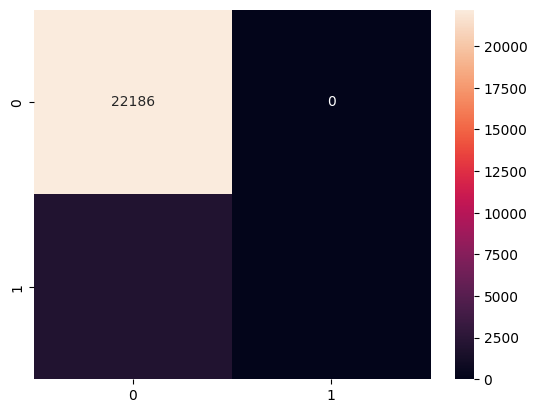

In [169]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

#prediction
y_predict_lr= lr.predict(X_test)

print("Logistic Regression Classifier Accuracy:", accuracy_score(y_test, y_predict_lr))
print("ROC AUC Score:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))
# evaluating with the classification report
print(classification_report(y_test, y_predict_lr))

# plotting the confusion metric
print(confusion_matrix(y_test, y_predict_lr))
sns.heatmap(confusion_matrix(y_test, y_predict_lr), annot=True, fmt='d')
plt.show()

#### DecisionTreeClassifier

Decision Tree Classifier Accuracy: 0.8628831814415907
ROC AUC Score: 0.5744470703213485
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     22186
           1       0.20      0.23      0.21      1954

    accuracy                           0.86     24140
   macro avg       0.57      0.57      0.57     24140
weighted avg       0.87      0.86      0.87     24140

[[20380  1806]
 [ 1504   450]]


<Axes: >

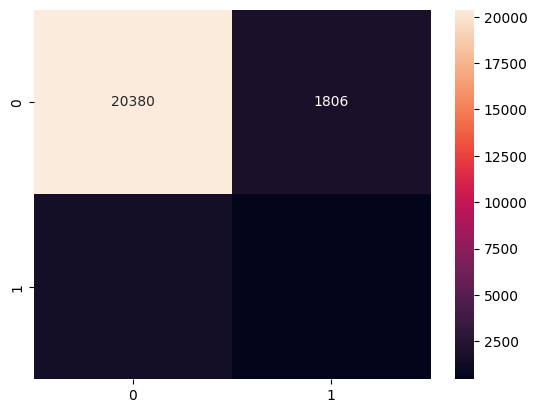

In [170]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# prediction
y_pred_dt = dt.predict(X_test)

# evaluating
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_dt))
#plotting the confusion matrics
print(confusion_matrix(y_test, y_pred_dt))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12]),
 [Text(0.0, 0, '0.00'),
  Text(0.02, 0, '0.02'),
  Text(0.04, 0, '0.04'),
  Text(0.06, 0, '0.06'),
  Text(0.08, 0, '0.08'),
  Text(0.1, 0, '0.10'),
  Text(0.12, 0, '0.12')])

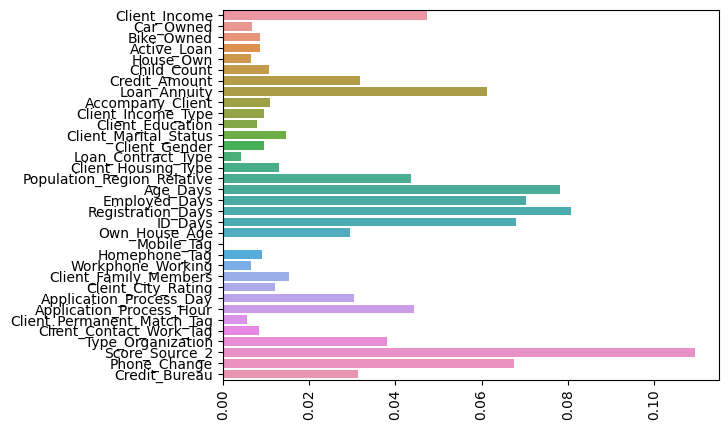

In [171]:
# making a plot of the feature importance 
sns.barplot(y=X.columns, x=dt.feature_importances_, orient='h')
plt.xticks(rotation=90)

#### Random forest

Random Forest Classifier Accuracy: 0.9240679370339685
ROC AUC Score: 0.7268165623271972
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22186
           1       1.00      0.06      0.12      1954

    accuracy                           0.92     24140
   macro avg       0.96      0.53      0.54     24140
weighted avg       0.93      0.92      0.89     24140

[[22186     0]
 [ 1833   121]]


<Axes: >

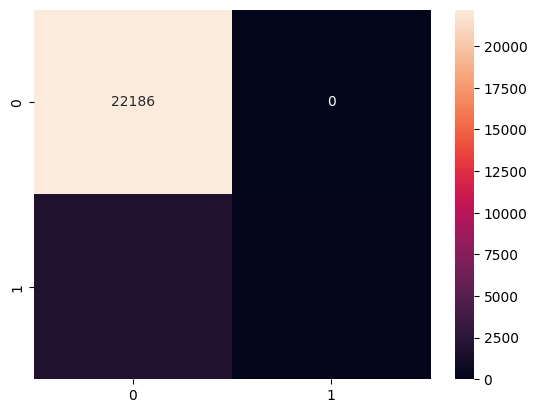

In [172]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predicting 
y_pred_rf = rf.predict(X_test)

# evaluating
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_rf))

# plotting the confusion matrix
print(confusion_matrix(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')

In [212]:
rf_important =  pd.DataFrame({'features':X.columns,'values':rf.feature_importances_})
rf_important = rf_important.sort_values(by='values', ascending=False)
rf_important

,features,values
31,Score_Source_2,0.096829
16,Age_Days,0.070387
18,Registration_Days,0.070299
19,ID_Days,0.069801
32,Phone_Change,0.065254
17,Employed_Days,0.063984
7,Loan_Annuity,0.061416
0,Client_Income,0.050577
27,Application_Process_Hour,0.046639
15,Population_Region_Relative,0.044477


(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12]),
 [Text(0.0, 0, '0.00'),
  Text(0.02, 0, '0.02'),
  Text(0.04, 0, '0.04'),
  Text(0.06, 0, '0.06'),
  Text(0.08, 0, '0.08'),
  Text(0.1, 0, '0.10'),
  Text(0.12, 0, '0.12')])

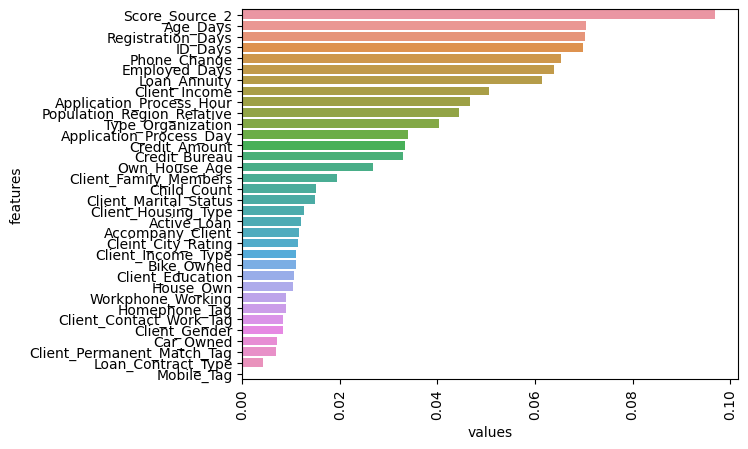

In [213]:
# plottint the feature importance
sns.barplot(data=rf_important, y='features', x='values')
plt.xticks(rotation=90)

#### GaussianNB

GaussianNB Classifier Accuracy: 0.33003314001657
ROC AUC Score: 0.5883822232080667
              precision    recall  f1-score   support

           0       0.94      0.29      0.44     22186
           1       0.09      0.80      0.16      1954

    accuracy                           0.33     24140
   macro avg       0.52      0.54      0.30     24140
weighted avg       0.87      0.33      0.42     24140

[[ 6411 15775]
 [  398  1556]]


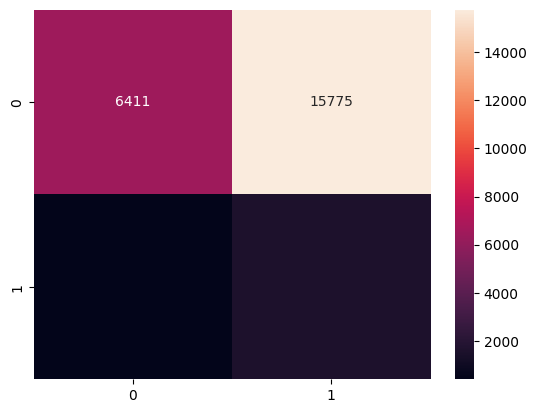

In [174]:
gbn = GaussianNB()
gbn.fit(X_train, y_train)

# prediction
y_pred_gbn = gbn.predict(X_test)

# evealuation
print("GaussianNB Classifier Accuracy:", accuracy_score(y_test, y_pred_gbn))
print("ROC AUC Score:", roc_auc_score(y_test, gbn.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_gbn))

# making a plot for confusion matrix
print(confusion_matrix(y_test, y_pred_gbn))
sns.heatmap(confusion_matrix(y_test, y_pred_gbn), annot=True, fmt='d')
plt.show()

#### CatBoostClassifier

Catboost Classifier Accuracy: 0.9194283347141674
ROC AUC Score: 0.7068661426825829
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22186
           1       0.60      0.01      0.03      1954

    accuracy                           0.92     24140
   macro avg       0.76      0.51      0.49     24140
weighted avg       0.89      0.92      0.88     24140

[[22167    19]
 [ 1926    28]]


<Axes: >

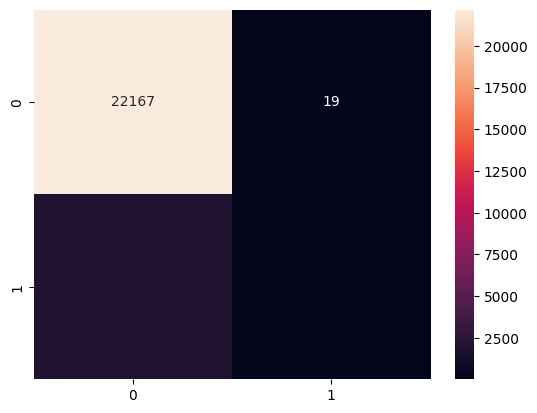

In [175]:
cb = CatBoostClassifier(random_state=42, verbose=0)
cb.fit(X_train, y_train)

# prediction
y_pred_cb = cb.predict(X_test)

# evaluating
print("Catboost Classifier Accuracy:", accuracy_score(y_test, y_pred_cb))
print("ROC AUC Score:", roc_auc_score(y_test, cb.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_cb))

#plotting the confusion matrix
print(confusion_matrix(y_test, y_pred_cb))
sns.heatmap(confusion_matrix(y_test, y_pred_cb), annot=True, fmt='d')

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14')])

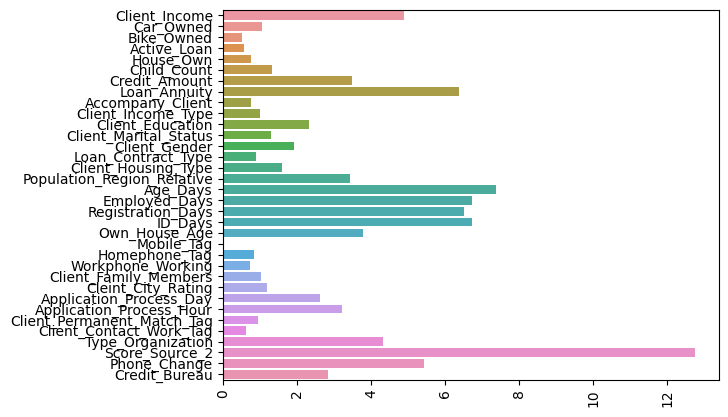

In [176]:
# feature importance
sns.barplot(y=X.columns, x=cb.feature_importances_, orient='h')
plt.xticks(rotation=90)

#### XGBoost

XGBoost Classifier Accuracy: 0.9193454846727424
ROC AUC Score: 0.7012420855000816
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22186
           1       0.55      0.02      0.04      1954

    accuracy                           0.92     24140
   macro avg       0.74      0.51      0.50     24140
weighted avg       0.89      0.92      0.88     24140

[[22155    31]
 [ 1916    38]]


<Axes: >

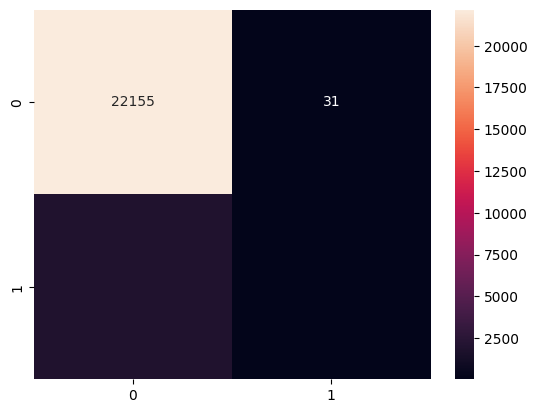

In [177]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# prediction
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("XGBoost Classifier Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_xgb))

#plotting the confusion matrix heatmap
print(confusion_matrix(y_test, y_pred_xgb))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d')


(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]),
 [Text(0.0, 0, '0.00'),
  Text(0.01, 0, '0.01'),
  Text(0.02, 0, '0.02'),
  Text(0.03, 0, '0.03'),
  Text(0.04, 0, '0.04'),
  Text(0.05, 0, '0.05'),
  Text(0.06, 0, '0.06'),
  Text(0.07, 0, '0.07')])

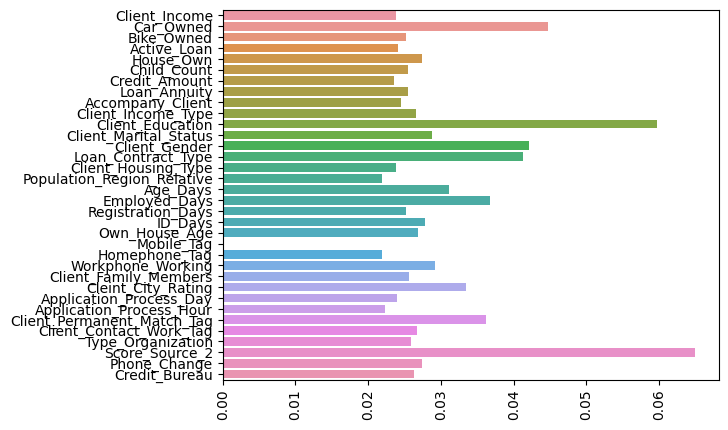

In [178]:
# plotting the feature importance 
sns.barplot(y=X.columns, x=xgb.feature_importances_, orient='h')
plt.xticks(rotation=90)

#### LightGBMClassifier

LightGBM Classifier Accuracy: 0.9191383595691798
ROC AUC Score: 0.7037999472405118
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22186
           1       0.58      0.00      0.01      1954

    accuracy                           0.92     24140
   macro avg       0.75      0.50      0.48     24140
weighted avg       0.89      0.92      0.88     24140

[[22181     5]
 [ 1947     7]]


<Axes: >

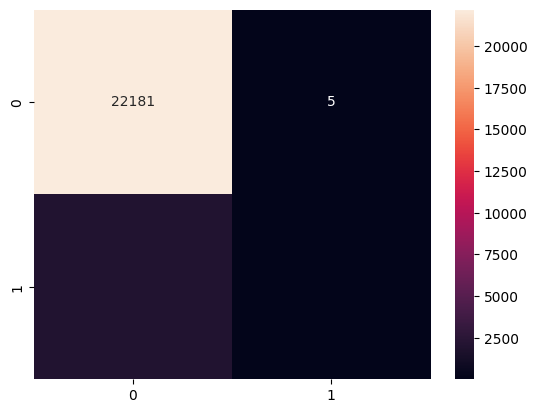

In [179]:

lgbm = LGBMClassifier(random_state=42, verbose=0)
lgbm.fit(X_train, y_train)

# prediction
y_pred_lgbm = lgbm.predict(X_test)
# Evaluating

print("LightGBM Classifier Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("ROC AUC Score:", roc_auc_score(y_test, lgbm.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_lgbm))


#plotting the confision matix heatmap
print(confusion_matrix(y_test, y_pred_lgbm))
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm), annot=True, fmt='d')


(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300')])

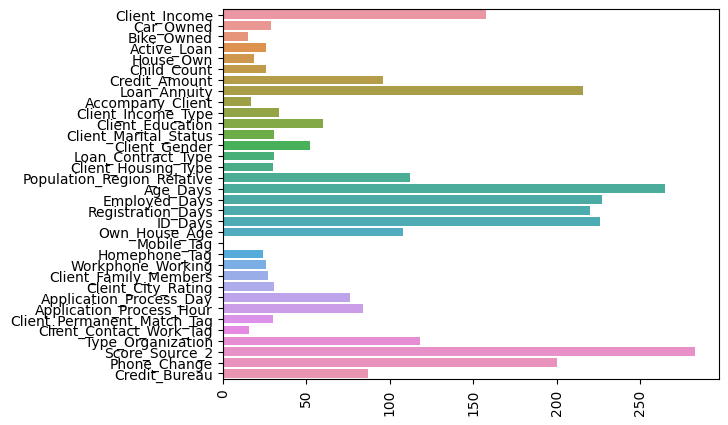

In [180]:
#plotting the feature importance 
sns.barplot(y=X.columns, x=lgbm.feature_importances_, orient='h')
plt.xticks(rotation=90)

#### AdaBoostClassifier

AdaBoost Classifier Accuracy: 0.9191383595691798
ROC AUC Score: 0.6915445077215883
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22186
           1       0.57      0.00      0.01      1954

    accuracy                           0.92     24140
   macro avg       0.75      0.50      0.48     24140
weighted avg       0.89      0.92      0.88     24140

[[22180     6]
 [ 1946     8]]


<Axes: >

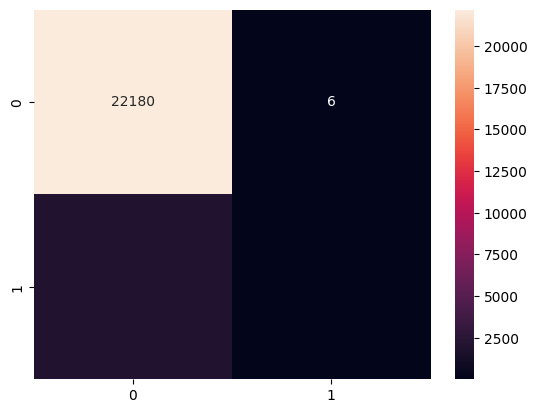

In [181]:
adb = AdaBoostClassifier(random_state=69)
adb.fit(X_train, y_train)

# predicting
y_pred = adb.predict(X_test)

print("AdaBoost Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, adb.predict_proba(X_test)[:, 1]))

# evaluating
print(classification_report(y_test, y_pred))

#plotting the confusion matrix
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
 [Text(0.0, 0, '0.00'),
  Text(0.05, 0, '0.05'),
  Text(0.1, 0, '0.10'),
  Text(0.15000000000000002, 0, '0.15'),
  Text(0.2, 0, '0.20'),
  Text(0.25, 0, '0.25'),
  Text(0.30000000000000004, 0, '0.30')])

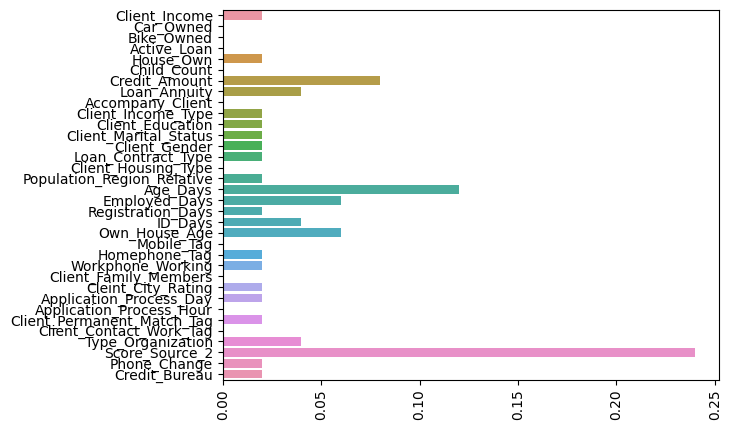

In [182]:
#plotting the feature importance 
sns.barplot(y=X.columns, x=adb.feature_importances_, orient='h')
plt.xticks(rotation=90)

Below are the models and their evaluation matrics:

                          f1-score (accurac) | accurac score      | pe 1 & 2 Error sum | AUC ROC value |
 
 
     Logistic Regression |      0.92         | 0.9190555095277547 |        1954        |    0.5910330460964577
 
     Decision tree       |      0.86         | 0.8622618061309031 |        3325        |    0.5757424596975362
 
     Random Forest       |      0.92         | 0.9234879867439933 |        1847        |    0.7249009859971447
 
     GausianNB           |      0.33         | 0.33003314001657   |        16173       |    0.5883822232080667
 
     LightGBM            |      0.92         | 0.9191383595691798 |        1997        |    0.7037999472405118
 
     XGBoost             |      0.92         | 0.9193454846727424 |        1947        |    0.7012420855000816
 
     Catboost            |      0.92         | 0.9194283347141674 |        1945        |    0.7068661426825829
   
     AdaBoost            |      0.92         |  0.9191383595691798 |       1952        |    0.6915445077215883
 

### Comparing all the evaluation metrices, the <code> Random Forest</code> has a more optimal accuracy of:    f1-score accuracy: 0.92,          accuracy score: 0.9234879867439933, Type 1 & 2 Error: 1847,      AUC ROC value: 0.7249009859971447

### Feature Engineering 

In [183]:
X.columns

Index(['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client',
       'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
       'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
       'Population_Region_Relative', 'Age_Days', 'Employed_Days',
       'Registration_Days', 'ID_Days', 'Own_House_Age', 'Mobile_Tag',
       'Homephone_Tag', 'Workphone_Working', 'Client_Family_Members',
       'Cleint_City_Rating', 'Application_Process_Day',
       'Application_Process_Hour', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 'Type_Organization', 'Score_Source_2',
       'Phone_Change', 'Credit_Bureau'],
      dtype='object')

In [184]:
# performing feature Engineering for the most performing features, most likely with most of the feaures

In [185]:
# Income-related features
df2 = df.copy()
df2['Client_Income_Per_Person'] = df2['Client_Income'] / df2['Client_Family_Members']
df2['Income_To_Loan_Ratio'] = df2['Client_Income'] / df2['Credit_Amount']

# Asset ownership
df2['Asset_Count'] = df2[['Car_Owned', 'Bike_Owned', 'House_Own']].sum(axis=1)

# Employment and stability
df2['Employment_Tenure_Years'] = df2['Employed_Days'] / 365
df2['Registration_Tenure_Years'] = df2['Registration_Days'] / 365

# Credit history
df2['Credit_Amount_Per_Income'] = df2['Credit_Amount'] / df2['Client_Income']

# Demographic features
df2['Age_In_Years'] = df2['Age_Days'] / 365
df2['Family_Size_Category'] = pd.cut(df2['Client_Family_Members'], bins=[0, 3, 6, 9, 12, 16], 
                                    labels=[1, 2, 3, 4, 5])

# Loan and credit features
df2['Loan_To_Income_Ratio'] = df2['Loan_Annuity'] / df2['Client_Income']


In [64]:
df2.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Phone_Change,Credit_Bureau,Default,Client_Income_Per_Person,Income_To_Loan_Ratio,Asset_Count,Employment_Tenure_Years,Registration_Tenure_Years,Credit_Amount_Per_Income,Age_In_Years,Family_Size_Category,Loan_To_Income_Ratio
0,6750.0,0.0,0.0,1.0,0.0,0.0,6119055.0,341685.0,1,1,4,1,1,0,1,28663.0,13957.0,1062.0,6123.000000,383.0,12.157324,1,1,0,2.0,2.0,6.0,17.0,1,1,42,0.478787,63.0,0.0,0,3375.0,0.001103,0.0,2.909589,16.775342,906.526667,38.238356,1,50.620000
1,20250.0,1.0,0.0,1.0,1.0,0.0,15282.0,182655.0,1,5,0,1,1,0,1,8575.0,14162.0,4129.0,7833.000000,21.0,0.000000,1,0,1,2.0,2.0,3.0,10.0,1,1,11,0.215068,0.0,0.0,0,10125.0,1.325088,2.0,11.312329,21.460274,0.754667,38.800000,1,9.020000
2,18000.0,0.0,0.0,1.0,0.0,1.0,5952735.0,27882.0,1,5,1,3,1,0,0,228.0,16790.0,5102.0,4977.736723,331.0,12.157324,1,0,0,2.0,2.0,4.0,10.0,1,1,42,0.552795,277.0,0.0,0,9000.0,0.003024,0.0,13.978082,13.637635,330.707500,46.000000,1,1.549000
3,15750.0,0.0,0.0,1.0,1.0,0.0,538704.0,229545.0,1,4,4,1,1,0,1,10556.0,23195.0,365243.0,4977.736723,775.0,12.157324,1,0,0,2.0,3.0,2.0,15.0,1,1,57,0.135182,1700.0,3.0,0,7875.0,0.029237,1.0,1000.665753,13.637635,34.203429,63.547945,1,14.574286
4,33750.0,1.0,0.0,1.0,0.0,2.0,1339884.0,354735.0,1,1,4,1,0,0,1,20713.0,11366.0,2977.0,5516.000000,4043.0,6.000000,1,0,0,4.0,1.0,3.0,10.0,1,1,5,0.301182,674.0,1.0,0,8437.5,0.025189,1.0,8.156164,15.112329,39.700267,31.139726,2,10.510667


In [198]:
df2.describe()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Phone_Change,Credit_Bureau,Default,Client_Income_Per_Person,Income_To_Loan_Ratio,Asset_Count,Employment_Tenure_Years,Registration_Tenure_Years,Credit_Amount_Per_Income,Age_In_Years,Loan_To_Income_Ratio
count,1.206970e+05,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,1.206970e+05,1.206970e+05,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,1.206970e+05,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000,120697.000000
mean,2.382019e+04,0.332842,0.322212,0.484072,0.701401,0.417781,8.197128e+05,1.388738e+05,1.841421,3.711426,2.931208,1.180535,0.663629,0.091121,1.063059,17267.082813,16027.454541,67113.155264,4977.751278,2986.193703,12.157361,0.999992,0.200494,0.281167,2.151155,2.029528,3.136482,12.001649,0.922765,0.820658,28.598698,0.507803,932.871695,1.603022,0.080930,1.323785e+04,0.133398,1.356455,183.871658,13.637675,54.652327,43.910834,8.940375
std,5.751999e+05,0.471232,0.467326,0.499748,0.457645,0.717306,1.233046e+06,1.421935e+05,1.798263,1.665126,1.728047,0.609410,0.472522,0.287782,0.551238,11533.106797,4170.498177,132690.059041,3355.982080,1429.800298,7.059497,0.002878,0.400372,0.449571,0.903384,0.499293,1.748876,3.249894,0.266965,0.383640,20.590286,0.727658,831.856735,1.843160,0.272729,2.920076e+05,1.618676,0.804440,363.534408,9.194471,83.436843,11.426022,9.331606
min,2.610000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000e+03,2.880000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,7676.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000005,0.000000,0.000000,0.000000,2.812500e+02,0.000355,0.000000,0.000000,0.000000,0.004156,21.030137,0.000114
25%,1.125000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,5.552730e+05,2.446200e+04,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,10032.000000,12757.000000,1028.000000,2280.000000,1896.000000,12.157324,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,1.000000,1.000000,5.000000,0.350383,224.000000,0.000000,0.000000,5.625000e+03,0.016484,1.000000,2.816438,6.246575,22.748741,34.950685,1.462593
50%,1.620000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,8.189547e+05,1.389608e+05,1.000000,5.000000,4.000000,1.000000,1.000000,0.000000,1.000000,17264.264432,16028.868442,2572.000000,4920.000000,2986.178729,12.157324,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,1.000000,1.000000,31.000000,0.553211,721.000000,1.000000,0.000000,7.931289e+03,0.027474,1.000000,7.046575,13.479452,36.397986,43.914708,6.176033
75%,2.379387e+04,1.000000,1.000000,1.000000,1.000000,1.000000,8.189547e+05,1.903950e+05,1.000000,5.000000,4.000000,1.000000,1.000000,0.000000,1.000000,19101.000000,19291.000000,67133.268429,7135.000000,4220.000000,12.157324,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,1.000000,1.000000,45.000000,0.659814,1550.000000,3.000000,0.000000,1.189693e+04,0.043958,2.000000,183.926763,19.547945,60.663310,52.852055,13.867742
max,1.916515e+08,1.000000,1.000000,1.000000,1.000000,19.000000,2.371298e+07,2.0646

In [199]:
df2.isnull().sum()

Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Own_House_Age                 0
Mobile_Tag                    0
Homephone_Tag                 0
Workphone_Working             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Type_Organization             0
Score_So

In [200]:
# separating the X and y features
X_2 = df2.drop('Default', axis=1)
y_2 = df2['Default']

#scaling with roburst scalar
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_2 = scaler.fit_transform(X_2)

# splitting into train and test set
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, stratify=y, random_state=42)

### Re-modelling 

### Trying Those models that gave above 70% ROC AUC value

#### Random Forest

Random Forest Classifier Accuracy: 0.922079536039768
ROC AUC Score: 0.7146665172214333
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22186
           1       1.00      0.04      0.07      1954

    accuracy                           0.92     24140
   macro avg       0.96      0.52      0.52     24140
weighted avg       0.93      0.92      0.89     24140

[[22186     0]
 [ 1881    73]]


<Axes: >

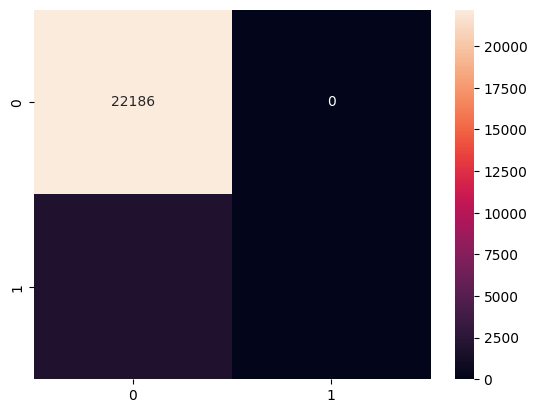

In [201]:
rf_2 = RandomForestClassifier()
rf_2.fit(X_train_2, y_train_2)

# predicting 
y_pred_rf_2 = rf_2.predict(X_test_2)

# evaluating
print("Random Forest Classifier Accuracy:", accuracy_score(y_test_2, y_pred_rf_2))
print("ROC AUC Score:", roc_auc_score(y_test_2, rf_2.predict_proba(X_test_2)[:, 1]))
print(classification_report(y_test_2, y_pred_rf_2))

# plotting the confusion matrix
print(confusion_matrix(y_test_2, y_pred_rf_2))
sns.heatmap(confusion_matrix(y_test_2, y_pred_rf_2), annot=True, fmt='d')


Catboost Classifier Accuracy: 0.9193040596520299
ROC AUC Score: 0.7093940400232113
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22186
           1       0.56      0.01      0.03      1954

    accuracy                           0.92     24140
   macro avg       0.74      0.51      0.49     24140
weighted avg       0.89      0.92      0.88     24140

[[22165    21]
 [ 1927    27]]


<Axes: >

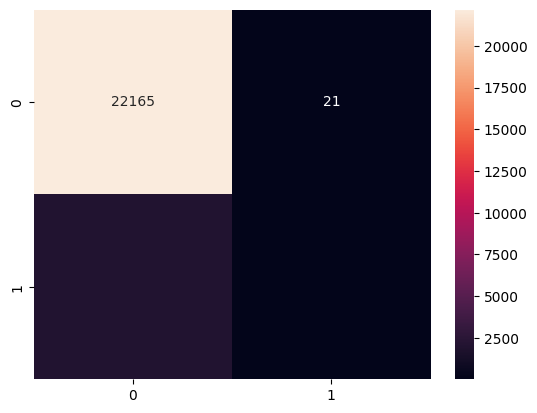

In [202]:
cb_2 = CatBoostClassifier(random_state=42, verbose=0)
cb_2.fit(X_train_2, y_train_2)

# prediction
y_pred_cb_2 = cb_2.predict(X_test_2)

# evaluating
print("Catboost Classifier Accuracy:", accuracy_score(y_test_2, y_pred_cb_2))
print("ROC AUC Score:", roc_auc_score(y_test_2, cb_2.predict_proba(X_test_2)[:, 1]))
print(classification_report(y_test_2, y_pred_cb_2))

#plotting the confusion matrix
print(confusion_matrix(y_test_2, y_pred_cb_2))
sns.heatmap(confusion_matrix(y_test_2, y_pred_cb_2), annot=True, fmt='d')



XGBoost Classifier Accuracy: 0.9187241093620547
ROC AUC Score: 0.6932351549812272
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22186
           1       0.45      0.02      0.04      1954

    accuracy                           0.92     24140
   macro avg       0.69      0.51      0.50     24140
weighted avg       0.88      0.92      0.88     24140

[[22140    46]
 [ 1916    38]]


<Axes: >

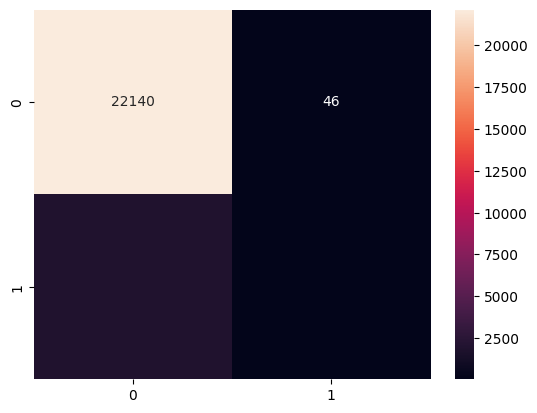

In [203]:
xgb_2 = XGBClassifier()
xgb_2.fit(X_train_2, y_train_2)

# prediction
y_pred_xgb_2 = xgb_2.predict(X_test_2)

# Evaluation
print("XGBoost Classifier Accuracy:", accuracy_score(y_test_2, y_pred_xgb_2))
print("ROC AUC Score:", roc_auc_score(y_test_2, xgb_2.predict_proba(X_test_2)[:, 1]))
print(classification_report(y_test_2, y_pred_xgb_2))

#plotting the confusion matrix heatmap
print(confusion_matrix(y_test_2, y_pred_xgb_2))
sns.heatmap(confusion_matrix(y_test_2, y_pred_xgb_2), annot=True, fmt='d')

LightGBM Classifier Accuracy: 0.9191383595691798
ROC AUC Score: 0.7037999472405118
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22186
           1       0.58      0.00      0.01      1954

    accuracy                           0.92     24140
   macro avg       0.75      0.50      0.48     24140
weighted avg       0.89      0.92      0.88     24140

[[22181     5]
 [ 1947     7]]


<Axes: >

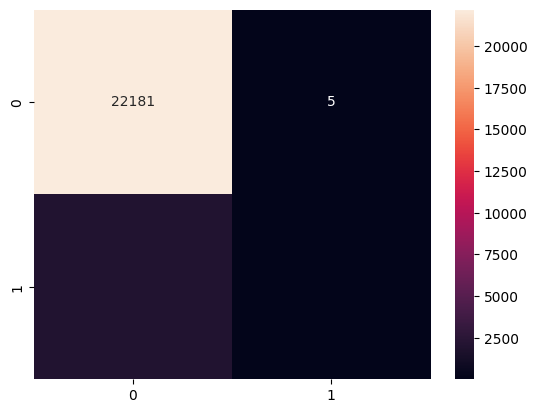

In [204]:
lgbm_2 = LGBMClassifier(random_state=42, verbose=0)
lgbm_2.fit(X_train, y_train)

# prediction
y_pred_lgbm_2 = lgbm_2.predict(X_test)
# Evaluating

print("LightGBM Classifier Accuracy:", accuracy_score(y_test, y_pred_lgbm_2))
print("ROC AUC Score:", roc_auc_score(y_test, lgbm_2.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_lgbm_2))


#plotting the confision matix heatmap
print(confusion_matrix(y_test, y_pred_lgbm_2))
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm_2), annot=True, fmt='d')


### Cross validation

#### Random Forest

In [207]:
#cross validation using the cross validate library
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score

# Define the random forest classifier
#rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the ROC-AUC scorer
roc_auc_scorer = make_scorer(roc_auc_score)

# Perform cross-validation with ROC-AUC as the evaluation metric
cv_results = cross_validate(rf, df.drop('Default', axis=1), df['Default'], cv=5, scoring=roc_auc_scorer)

# Print the average ROC-AUC value across the folds
print(f"Average ROC-AUC value: {cv_results['test_score'].mean():.4f}")



Average ROC-AUC value: 0.5292


#### catboost

In [209]:
#cross validation using the cross validate library
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score

# Define the random forest classifier
#rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the ROC-AUC scorer
roc_auc_scorer = make_scorer(roc_auc_score)

# Perform cross-validation with ROC-AUC as the evaluation metric
cv_results = cross_validate(cb, df.drop('Default', axis=1), df['Default'], cv=5, scoring=roc_auc_scorer)

# Print the average ROC-AUC value across the folds
print(f"Average ROC-AUC value: {cv_results['test_score'].mean():.4f}")


Average ROC-AUC value: 0.5060


#### xgboost

In [210]:
#cross validation using the cross validate library
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score

# Define the random forest classifier
#rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the ROC-AUC scorer
roc_auc_scorer = make_scorer(roc_auc_score)

# Perform cross-validation with ROC-AUC as the evaluation metric
cv_results = cross_validate(xgb, df.drop('Default', axis=1), df['Default'], cv=5, scoring=roc_auc_scorer)

# Print the average ROC-AUC value across the folds
print(f"Average ROC-AUC value: {cv_results['test_score'].mean():.4f}")


Average ROC-AUC value: 0.5084


#### lightgbm

In [211]:
#cross validation using the cross validate library
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score

# Define the random forest classifier
#rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the ROC-AUC scorer
roc_auc_scorer = make_scorer(roc_auc_score)

# Perform cross-validation with ROC-AUC as the evaluation metric
cv_results = cross_validate(lgbm, df.drop('Default', axis=1), df['Default'], cv=5, scoring=roc_auc_scorer)

# Print the average ROC-AUC value across the folds
print(f"Average ROC-AUC value: {cv_results['test_score'].mean():.4f}")


Average ROC-AUC value: 0.5019
